In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import folium
from IPython.display import display
import torch
import torch.optim as optim

pio.renderers.default = 'notebook_connected'
plt.style.use("ggplot")


In [2]:
df = pd.read_csv("jeju_bus.csv")   # 'jeju_bus.csv' 파일을 읽어서 df라는 변수에 저장합니다.
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [3]:
##########################################버스 도착 시간 칼럼 추가
df['now_arrive_time']

0         06시
1         06시
2         06시
3         06시
4         07시
         ... 
210452    21시
210453    21시
210454    21시
210455    21시
210456    21시
Name: now_arrive_time, Length: 210457, dtype: object

In [4]:
df['now_arrive_time'].str.replace('시', '')

0         06
1         06
2         06
3         06
4         07
          ..
210452    21
210453    21
210454    21
210455    21
210456    21
Name: now_arrive_time, Length: 210457, dtype: object

In [5]:
df['now_arrive_time'].str.replace('시', '').astype(int)

0          6
1          6
2          6
3          6
4          7
          ..
210452    21
210453    21
210454    21
210455    21
210456    21
Name: now_arrive_time, Length: 210457, dtype: int32

In [6]:
df['hour'] = df['now_arrive_time'].str.replace('시', '').astype(int)

df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21


In [7]:
################################버스 이동 속도 구하기
df['speed'] = df['distance'] / df['next_arrive_time']

df


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421


In [8]:
#############################################기본 정보 확인


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
 14  hour              210457 non-null  int32  
 15  speed             210457 non-null  float64
dtypes: float64(6), int32

In [9]:
#############################################데이터 확인

df.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824,13.785990,6.887892
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170,4.682768,3.529959
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000,0.000000,0.064694
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000,10.000000,4.127273
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000,14.000000,6.330000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000,18.000000,9.085938
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000,23.000000,27.978261


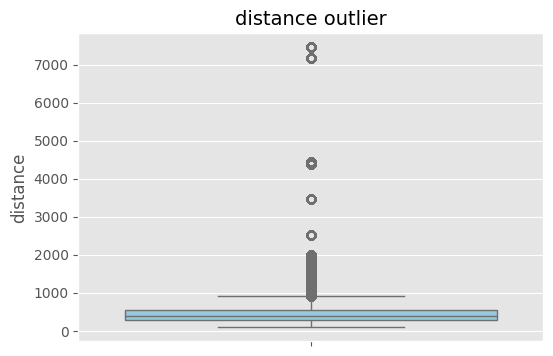

In [10]:
####################################버스 이상치 시각화

plt.figure(figsize=(6, 4))

sns.boxplot(y=df['distance'], color='skyblue')

plt.title('distance outlier', fontsize=14)

plt.ylabel("distance")

plt.show()

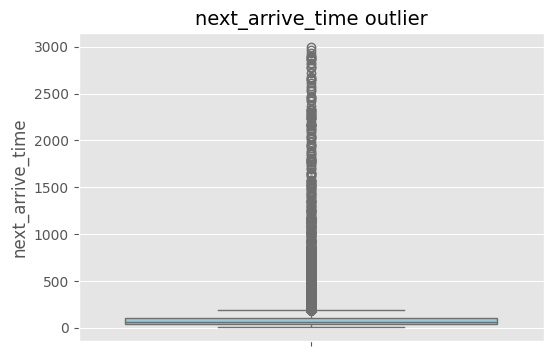

In [11]:
plt.figure(figsize=(6, 4))

sns.boxplot(y=df["next_arrive_time"], color='skyblue')

plt.title('next_arrive_time outlier', fontsize=14)

plt.ylabel("next_arrive_time")

plt.show()

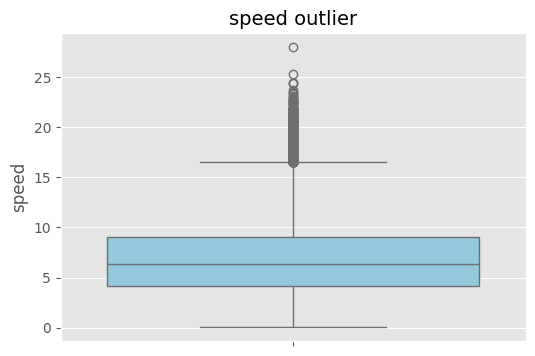

In [12]:

plt.figure(figsize=(6, 4))

sns.boxplot(y=df["speed"], color='skyblue')

plt.title('speed outlier', fontsize=14)

plt.ylabel("speed")

plt.show()

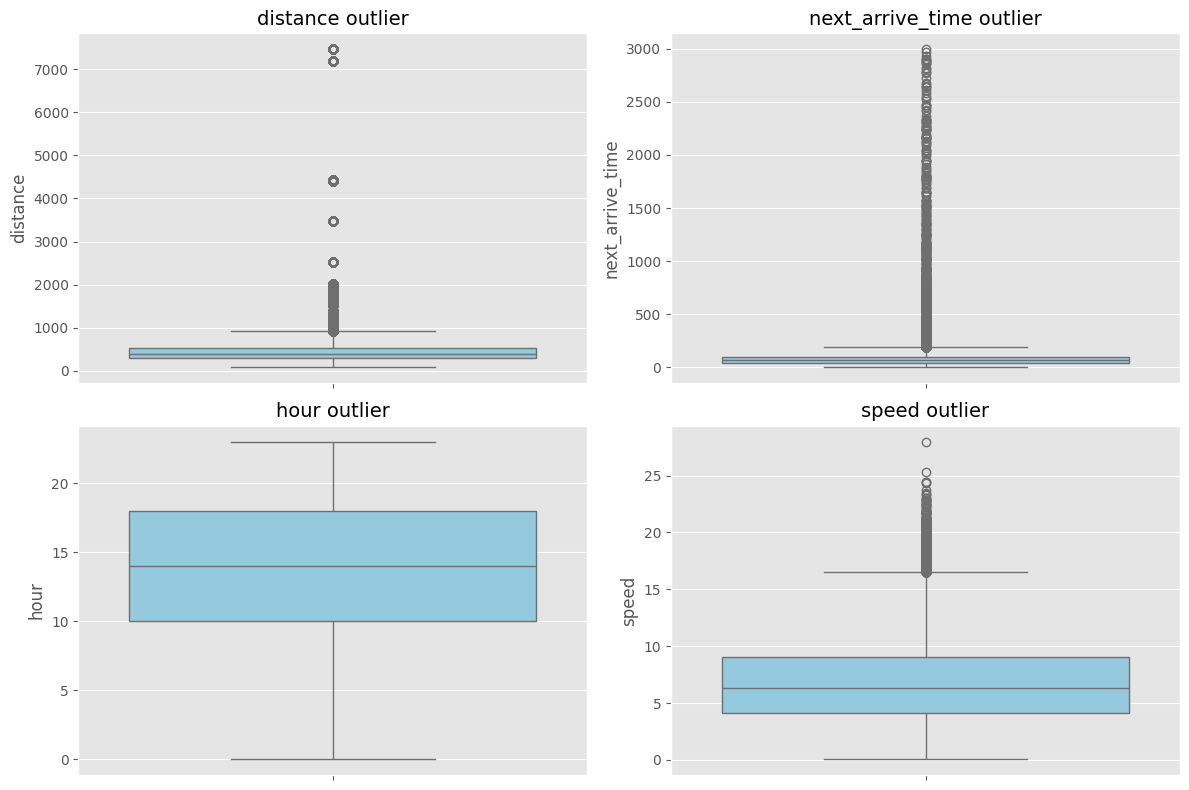

In [13]:
########################################이상치 처리

cols_to_plot = ['distance', 'next_arrive_time', 'hour', 'speed']

plt.figure(figsize=(12, 8))

for idx, col in enumerate(cols_to_plot, 1):

  plt.subplot(2, 2, idx)

  sns.boxplot(y=df[col], color='skyblue')

  plt.title(f'{col} outlier', fontsize=14)

  plt.ylabel(col)

plt.tight_layout()

plt.show()

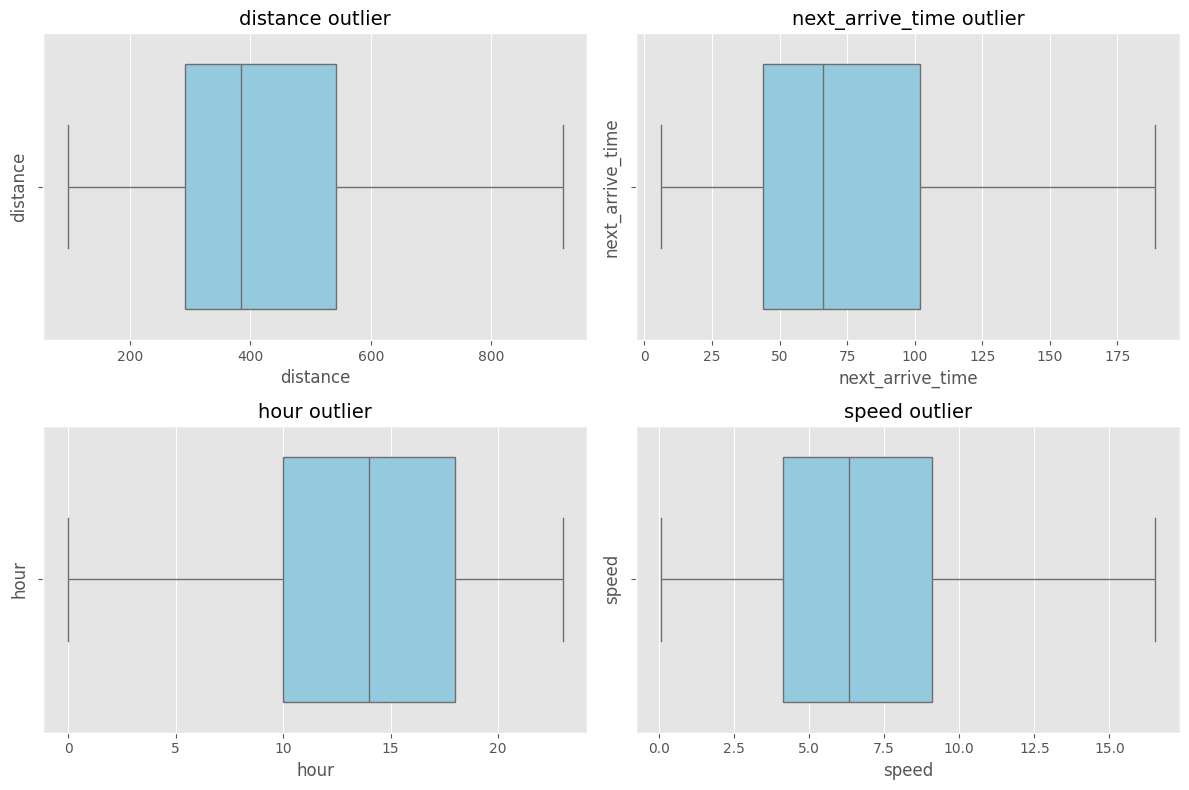

In [14]:

cols = ['distance', 'next_arrive_time', 'hour', 'speed']

for col in cols:
    
    Q1 = df[col].quantile(0.25)  # 1사분위수 구함 (데이터 하위 25% 지점)
    Q3 = df[col].quantile(0.75)  # 3사분위수 구함 (데이터 하위 75% 지점)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  # 이상치 범위의 하한(최소)
    upper_bound = Q3 + 1.5 * IQR  # 이상치 범위의 상한(최대)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

cols_to_plot = ['distance', 'next_arrive_time', 'hour', 'speed']

plt.figure(figsize=(12, 8))

for idx, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} outlier', fontsize=14)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [15]:
############################################상관 관계 분석
numeric_df = df.select_dtypes(include=['number'])

numeric_df

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,405136001,7997025,33.456267,126.551750,266.0,33.457724,126.554014,24,6,11.083333
1,1,405136001,7997025,33.457724,126.554014,333.0,33.458783,126.557353,36,6,9.250000
2,2,405136001,7997025,33.458783,126.557353,415.0,33.459893,126.561624,40,6,10.375000
3,3,405136001,7997025,33.479705,126.543811,578.0,33.484860,126.542928,42,6,13.761905
4,4,405136001,7997025,33.485662,126.494923,374.0,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,405328102,7983486,33.255783,126.577450,528.0,33.251896,126.574417,96,21,5.500000
210453,210453,405328102,7983486,33.248595,126.568527,280.0,33.249753,126.565959,50,21,5.600000
210454,210454,405328102,7983486,33.251891,126.560303,114.0,33.251084,126.559551,16,21,7.125000
210455,210455,405328102,7983486,33.251084,126.559551,223.0,33.249504,126.558068,38,21,5.868421


In [16]:
corr_matrix = numeric_df.corr()

corr_matrix

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
id,1.000000,0.070271,-0.069053,-0.033693,0.028164,0.005924,-0.033395,0.027867,-0.017654,0.025857,0.024088
route_id,0.070271,1.000000,-0.998641,-0.432923,0.555106,0.121910,-0.431895,0.552970,-0.238076,0.007603,0.338925
vh_id,-0.069053,-0.998641,1.000000,0.421832,-0.579469,-0.120384,0.420799,-0.577379,0.243466,-0.006668,-0.342974
now_latitude,-0.033693,-0.432923,0.421832,1.000000,-0.083973,-0.018942,0.998971,-0.085858,0.167976,-0.010887,-0.188539
now_longitude,0.028164,0.555106,-0.579469,-0.083973,1.000000,0.153731,-0.082066,0.999531,-0.177942,-0.012707,0.338618
distance,0.005924,0.121910,-0.120384,-0.018942,0.153731,1.000000,-0.015667,0.153128,0.420708,-0.001808,0.408078
next_latitude,-0.033395,-0.431895,0.420799,0.998971,-0.082066,-0.015667,1.000000,-0.083894,0.169284,-0.010949,-0.186734
next_longitude,0.027867,0.552970,-0.577379,-0.085858,0.999531,0.153128,-0.083894,1.000000,-0.178025,-0.013694,0.338278
next_arrive_time,-0.017654,-0.238076,0.243466,0.167976,-0.177942,0.420708,0.169284,-0.178025,1.000000,-0.003822,-0.520625
hour,0.025857,0.007603,-0.006668,-0.010887,-0.012707,-0.001808,-0.010949,-0.013694,-0.003822,1.000000,0.010747


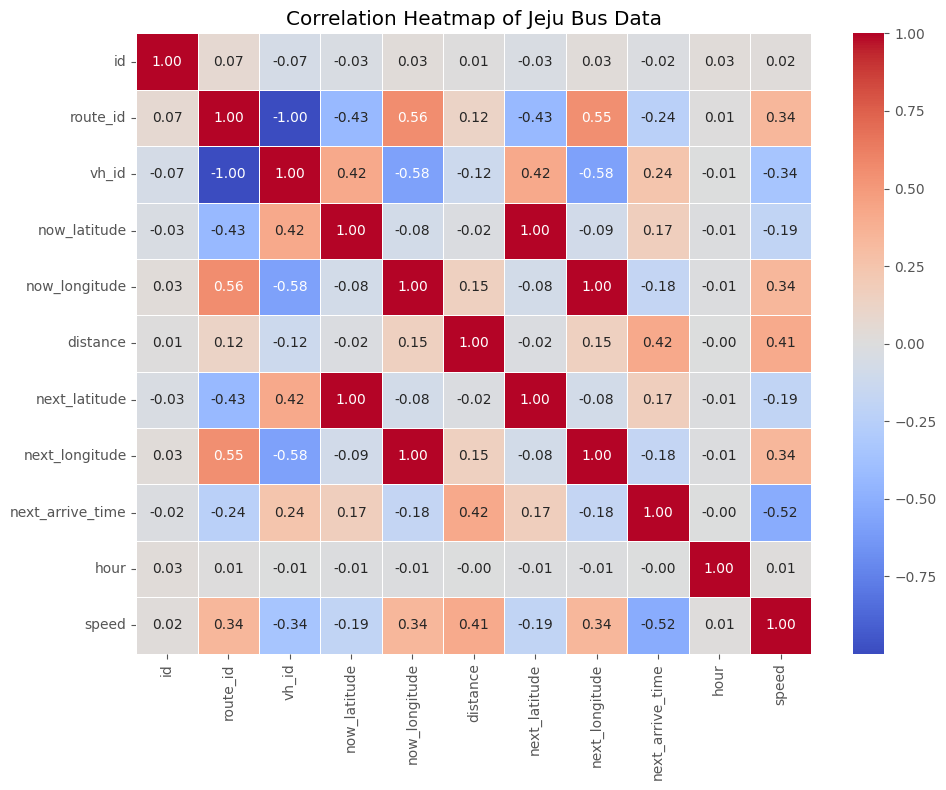

In [17]:
##############################히트맵 이용 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Heatmap of Jeju Bus Data')
plt.tight_layout()

plt.show()

In [18]:

###################################### 버스 정류소 위치 시각화
from branca.colormap import LinearColormap
from branca.colormap import linear
from IPython.display import IFrame
from folium import Map, CircleMarker
from IPython.display import display
from ipywidgets import interact

df[['now_latitude', 'now_longitude']]

,now_latitude,now_longitude
0,33.456267,126.551750
1,33.457724,126.554014
2,33.458783,126.557353
3,33.479705,126.543811
4,33.485662,126.494923
...,...,...
210452,33.255783,126.577450
210453,33.248595,126.568527
210454,33.251891,126.560303
210455,33.251084,126.559551


In [19]:
df[['now_latitude', 'now_longitude']].sort_values(by=['now_latitude', 'now_longitude'])

,now_latitude,now_longitude
7133,33.244382,126.531680
7396,33.244382,126.531680
7573,33.244382,126.531680
7669,33.244382,126.531680
7788,33.244382,126.531680
...,...,...
204558,33.556167,126.759317
205613,33.556167,126.759317
205654,33.556167,126.759317
205843,33.556167,126.759317


In [20]:
df_unique = df.drop_duplicates(subset=['now_latitude', 'now_longitude'])

df_unique

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42273,42273,2019-10-17,405320121,7983092,201-21,33.462001,126.910329,오조리상동입구,07시,424.0,오조리하동,33.458533,126.912250,68,7,6.235294
70487,70487,2019-10-19,405320115,7983096,201-15,33.260674,126.607735,서귀포동부도서관,18시,918.5,상효입구,33.259648,126.595047,130,18,9.246154
71394,71394,2019-10-19,405320116,7983093,201-16,33.506815,126.877643,전경대 입구,08시,918.5,상도마을회관,33.514450,126.866133,118,8,11.584746
72459,72459,2019-10-19,405320121,7983092,201-21,33.402263,126.895551,온평리,12시,918.5,화성농장,33.391967,126.889533,46,12,16.523935


In [21]:
df_unique = df_unique.reset_index()

df_unique

,index,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,42273,42273,2019-10-17,405320121,7983092,201-21,33.462001,126.910329,오조리상동입구,07시,424.0,오조리하동,33.458533,126.912250,68,7,6.235294
565,70487,70487,2019-10-19,405320115,7983096,201-15,33.260674,126.607735,서귀포동부도서관,18시,918.5,상효입구,33.259648,126.595047,130,18,9.246154
566,71394,71394,2019-10-19,405320116,7983093,201-16,33.506815,126.877643,전경대 입구,08시,918.5,상도마을회관,33.514450,126.866133,118,8,11.584746
567,72459,72459,2019-10-19,405320121,7983092,201-21,33.402263,126.895551,온평리,12시,918.5,화성농장,33.391967,126.889533,46,12,16.523935


In [22]:
map_jeju = folium.Map(
    location=[
        df_unique['now_latitude'].mean(),
        df_unique['now_longitude'].mean()
    ],
    zoom_start=11

)

for idx in range(len(df_unique)):
    row = df_unique.loc[idx]

    # 마커 생성 및 지도에 추가
    folium.Marker(
        location=[row['now_latitude'], row['now_longitude']],
        popup=f"{row['now_station']}",
        icon=folium.Icon(icon='bus', color='blue')
    ).add_to(map_jeju)

    # 선(Polyline) 생성 및 지도에 추가
    folium.PolyLine(
        locations=[
            [row['now_latitude'], row['now_longitude']],
            [row['next_latitude'], row['next_longitude']]
        ],
        color='green',
        weight=2
    ).add_to(map_jeju)

# HTML로 저장
map_jeju.save("jeju_map.html")

from IPython.display import IFrame
IFrame("jeju_map.html", width='100%', height=800)

In [23]:
######################################가장 많이 정차하는 정륫ㅎ top 20
df['now_station'].value_counts()

now_station
남국원(아라방면)     3361
아라주공아파트       3098
도호동           3093
인다마을          3056
은남동           2789
              ... 
상도리 세화고등학교      25
오조리상동입구         21
세화고등학교          18
하도리 개긋물         11
전경대 입구           7
Name: count, Length: 348, dtype: int64

In [24]:
df['now_station'].value_counts().head(20)

now_station
남국원(아라방면)          3361
아라주공아파트            3098
도호동                3093
인다마을               3056
은남동                2789
제원아파트              2728
동문로터리              2606
제주여자중고등학교(아라방면)    2474
삼무공원사거리            2363
청소년문화의집            2290
제주대학교병원            2281
제대마을               2232
아라초등학교             2215
한라병원               2192
탐라장애인 종합복지관        2166
연동주민센터             2106
제주도청 신제주로터리        2090
주공 3 4단지           2047
제주시청(광양방면)         2021
고산동산(광양방면)         1997
Name: count, dtype: int64

In [25]:
top20_counts = df['now_station'].value_counts().head(20)

top20_counts

now_station
남국원(아라방면)          3361
아라주공아파트            3098
도호동                3093
인다마을               3056
은남동                2789
제원아파트              2728
동문로터리              2606
제주여자중고등학교(아라방면)    2474
삼무공원사거리            2363
청소년문화의집            2290
제주대학교병원            2281
제대마을               2232
아라초등학교             2215
한라병원               2192
탐라장애인 종합복지관        2166
연동주민센터             2106
제주도청 신제주로터리        2090
주공 3 4단지           2047
제주시청(광양방면)         2021
고산동산(광양방면)         1997
Name: count, dtype: int64

In [26]:
top20_counts.index

Index(['남국원(아라방면)', '아라주공아파트', '도호동', '인다마을', '은남동', '제원아파트', '동문로터리',
       '제주여자중고등학교(아라방면)', '삼무공원사거리', '청소년문화의집', '제주대학교병원', '제대마을', '아라초등학교',
       '한라병원', '탐라장애인 종합복지관', '연동주민센터', '제주도청 신제주로터리', '주공 3 4단지',
       '제주시청(광양방면)', '고산동산(광양방면)'],
      dtype='object', name='now_station')

In [27]:
top20_counts.values

array([3361, 3098, 3093, 3056, 2789, 2728, 2606, 2474, 2363, 2290, 2281,
       2232, 2215, 2192, 2166, 2106, 2090, 2047, 2021, 1997], dtype=int64)

In [28]:
df_top20_counts = df[df['now_station'].isin(top20_counts.index)]

df_top20_counts

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
11,11,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,08시,291.0,삼무공원사거리,33.489900,126.488917,62,8,4.693548
12,12,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,08시,381.0,제원아파트,33.487531,126.489892,88,8,4.329545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210438,210438,2019-10-28,405328102,7983486,281-2,33.473079,126.545689,아라주공아파트,18시,328.0,아라동주민센터,33.475900,126.544900,100,18,3.280000
210444,210444,2019-10-28,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),18시,447.0,제주시청(광양방면),33.498925,126.530351,78,18,5.730769
210445,210445,2019-10-28,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),18시,418.0,광양사거리,33.500473,126.527103,116,18,3.603448
210448,210448,2019-10-28,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,272.0,제주지방법원(광양방면),33.493625,126.534764,32,20,8.500000


In [29]:
df_top20_counts = df_top20_counts.drop_duplicates(subset=['now_station', 'now_latitude', 'now_longitude'])

df_top20_counts

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
11,11,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,08시,291.0,삼무공원사거리,33.489900,126.488917,62,8,4.693548
12,12,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,08시,381.0,제원아파트,33.487531,126.489892,88,8,4.329545
13,13,2019-10-15,405136001,7997025,360-1,33.487531,126.489892,제원아파트,08시,267.0,은남동,33.485822,126.490897,66,8,4.045455
14,14,2019-10-15,405136001,7997025,360-1,33.485822,126.490897,은남동,08시,374.0,도호동,33.485662,126.494923,158,8,2.367089
16,16,2019-10-15,405136001,7997025,360-1,33.487317,126.496617,연동주민센터,08시,455.0,제주도청 신제주로터리,33.491433,126.496783,86,8,5.290698
17,17,2019-10-15,405136001,7997025,360-1,33.491433,126.496783,제주도청 신제주로터리,08시,528.0,연동입구,33.496203,126.496995,168,8,3.142857
24,24,2019-10-15,405136001,7997025,360-1,33.500017,126.525833,탐라장애인 종합복지관,08시,459.0,제주시청(아라방면),33.499560,126.529771,66,8,6.954545


In [30]:
df_top20_counts = df_top20_counts.merge(top20_counts.rename('count'), left_on='now_station', right_index=True)

df_top20_counts

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed,count
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000,2232
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905,3361
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750,3093
11,11,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,08시,291.0,삼무공원사거리,33.489900,126.488917,62,8,4.693548,2192
12,12,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,08시,381.0,제원아파트,33.487531,126.489892,88,8,4.329545,2363
13,13,2019-10-15,405136001,7997025,360-1,33.487531,126.489892,제원아파트,08시,267.0,은남동,33.485822,126.490897,66,8,4.045455,2728
14,14,2019-10-15,405136001,7997025,360-1,33.485822,126.490897,은남동,08시,374.0,도호동,33.485662,126.494923,158,8,2.367089,2789
16,16,2019-10-15,405136001,7997025,360-1,33.487317,126.496617,연동주민센터,08시,455.0,제주도청 신제주로터리,33.491433,126.496783,86,8,5.290698,2106
17,17,2019-10-15,405136001,7997025,360-1,33.491433,126.496783,제주도청 신제주로터리,08시,528.0,연동입구,33.496203,126.496995,168,8,3.142857,2090
24,24,2019-10-15,405136001,7997025,360-1,33.500017,126.525833,탐라장애인 종합복지관,08시,459.0,제주시청(아라방면),33.499560,126.529771,66,8,6.954545,2166


In [31]:
def normalize_size(x, min_size=8, max_size=20):
    return ((x - top20_counts.min()) / (top20_counts.max() - top20_counts.min())) * (max_size - min_size) + min_size

colormap = linear.YlOrRd_09.scale(top20_counts.min(), top20_counts.max())
colormap.caption = "정류장 정차 횟수 (TOP 20)"
map_jeju = folium.Map(
    location=[df_top20_counts['now_latitude'].mean(), df_top20_counts['now_longitude'].mean()],
    zoom_start=11,
    width='100%',
    height='800px'
)

for _, row in df_top20_counts.iterrows():
    folium.CircleMarker(
        location=[row['now_latitude'], row['now_longitude']],
        radius=normalize_size(row['count']),
        popup=f"{row['now_station']}<br>정차 횟수 : {row['count']}",
        tooltip=row['now_station'],
        color=colormap(row['count']),
        fill=True,
        fill_color=colormap(row['count']),
        fill_opacity=0.7
    ).add_to(map_jeju)
colormap.add_to(map_jeju)

map_jeju.save("bus_stop_count.html")

IFrame("bus_stop_count.html", width='100%', height=800)


In [32]:
###############################################시간대별 정류장 시각화
df_unique = df.drop_duplicates(subset=['now_station', 'now_latitude', 'now_longitude', 'hour'])

df_unique

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206216,206216,2019-10-28,405320121,7983092,201-21,33.500657,126.890509,금붕사,17시,837.0,종달리,33.494950,126.896167,94,17,8.904255
206347,206347,2019-10-28,405320122,7983028,201-22,33.452300,126.914133,고성오일시장,13시,325.0,고성리제주은행,33.449467,126.915050,54,13,6.018519
206348,206348,2019-10-28,405320122,7983028,201-22,33.449467,126.915050,고성리제주은행,13시,335.0,성산환승정류장(고성리 회전교차로),33.447279,126.913783,189,13,0.718884
207281,207281,2019-10-28,405320127,7983229,201-27,33.520956,126.600847,삼양검문소,13시,779.0,진드르,33.524196,126.608128,68,13,11.455882


In [33]:
pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count')

now_latitude
hour now_station              
0    고성리제주은행                 1
     성산리                     1
     성산일출봉입구                 1
     종달리                     1
     종달초등학교                  1
...                        ...
23   함덕리 3구                  1
     해양연구소                   1
     현대산부인과                  1
     홍랑로입구                   1
     흙통                      1

[5985 rows x 1 columns]

In [34]:
pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count')

now_latitude
hour now_station              
0    고성리제주은행                 1
     성산리                     1
     성산일출봉입구                 1
     종달리                     1
     종달초등학교                  1
...                        ...
23   함덕리 3구                  1
     해양연구소                   1
     현대산부인과                  1
     홍랑로입구                   1
     흙통                      1

[5985 rows x 1 columns]

In [35]:
pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count').reset_index()

,hour,now_station,now_latitude
0,0,고성리제주은행,1
1,0,성산리,1
2,0,성산일출봉입구,1
3,0,종달리,1
4,0,종달초등학교,1
...,...,...,...
5980,23,함덕리 3구,1
5981,23,해양연구소,1
5982,23,현대산부인과,1
5983,23,홍랑로입구,1


In [36]:
pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count').reset_index().rename(columns={'now_latitude' : 'count'})

,hour,now_station,count
0,0,고성리제주은행,1
1,0,성산리,1
2,0,성산일출봉입구,1
3,0,종달리,1
4,0,종달초등학교,1
...,...,...,...
5980,23,함덕리 3구,1
5981,23,해양연구소,1
5982,23,현대산부인과,1
5983,23,홍랑로입구,1


In [37]:
station_pivot = pd.pivot_table(df_unique,
                                index=['hour', 'now_station'],
                                values='now_latitude',
                                aggfunc='count').reset_index().rename(columns={'now_latitude': 'count'})
station_pivot

,hour,now_station,count
0,0,고성리제주은행,1
1,0,성산리,1
2,0,성산일출봉입구,1
3,0,종달리,1
4,0,종달초등학교,1
...,...,...,...
5980,23,함덕리 3구,1
5981,23,해양연구소,1
5982,23,현대산부인과,1
5983,23,홍랑로입구,1


In [38]:
def plot_hourly_map(selected_hour):
    hour_data = df_unique[df_unique['hour'] == selected_hour]
    m = folium.Map(
        location=[df['now_latitude'].mean(), df['now_longitude'].mean()],
        zoom_start=11,
        width='100%',
        height='800px'
    )
    for _, row in hour_data.iterrows():
        folium.Marker(
            location=[row['now_latitude'], row['now_longitude']],  #  마커의 위치를 위도와 경도로 지정합니다.
            popup=row['now_station'],                               #  마커를 클릭하면 정류장 이름이 표시됩니다.
            tooltip=row['now_station'],                             #  마우스를 올렸을 때 정류장 이름이 툴팁으로 뜹니다.
            icon=folium.Icon(
                icon='bus',                                         #  마커 아이콘을 버스 모양으로 설정합니다.
                prefix='fa',                                        # 'fa'는 폰트어썸(FontAwesome) 아이콘을 사용하겠다는 설정입니다.
                color='blue'                                        # 마커 색깔을 파란색으로 지정합니다.
            )
        ).add_to(m)  # 생성된 마커를 지도 객체 m에 추가합니다.
    map_file = f"hour_{selected_hour:02d}_stations.html"
    m.save(map_file)
    display(IFrame(map_file, width='100%', height='800px'))
interact(plot_hourly_map, selected_hour=(0, 23))

interactive(children=(IntSlider(value=11, description='selected_hour', max=23), Output()), _dom_classes=('widg…

<function __main__.plot_hourly_map(selected_hour)>

In [39]:
##########################################################예측시간 구현
X = df[[
    "now_latitude", 'now_longitude', 'distance',
    'next_latitude', 'next_longitude', 'hour', 'speed'
]]
X

,now_latitude,now_longitude,distance,next_latitude,next_longitude,hour,speed
0,33.456267,126.551750,266.0,33.457724,126.554014,6,11.083333
1,33.457724,126.554014,333.0,33.458783,126.557353,6,9.250000
2,33.458783,126.557353,415.0,33.459893,126.561624,6,10.375000
3,33.479705,126.543811,578.0,33.484860,126.542928,6,13.761905
4,33.485662,126.494923,374.0,33.485822,126.490897,7,5.843750
...,...,...,...,...,...,...,...
210452,33.255783,126.577450,528.0,33.251896,126.574417,21,5.500000
210453,33.248595,126.568527,280.0,33.249753,126.565959,21,5.600000
210454,33.251891,126.560303,114.0,33.251084,126.559551,21,7.125000
210455,33.251084,126.559551,223.0,33.249504,126.558068,21,5.868421


In [40]:
X_mean = X.mean()
X_mean

now_latitude       33.434528
now_longitude     126.603451
distance          434.773426
next_latitude      33.434711
next_longitude    126.603687
hour               13.785990
speed               6.875746
dtype: float64

In [41]:
X_std = X.std()

X_std

now_latitude        0.102350
now_longitude       0.123961
distance          194.693029
next_latitude       0.102224
next_longitude      0.123838
hour                4.682768
speed               3.491996
dtype: float64

In [42]:
X_scaled = (X - X_mean) / X_std
X_scaled

,now_latitude,now_longitude,distance,next_latitude,next_longitude,hour,speed
0,0.212397,-0.417070,-0.866869,0.225124,-0.401113,-1.662690,1.204923
1,0.226632,-0.398806,-0.522738,0.235484,-0.374150,-1.662690,0.679913
2,0.236979,-0.371870,-0.101562,0.246342,-0.339662,-1.662690,1.002078
3,0.441396,-0.481114,0.735653,0.490581,-0.490633,-1.662690,1.971984
4,0.499598,-0.875495,-0.312150,0.499992,-0.910786,-1.449141,-0.295532
...,...,...,...,...,...,...,...
210452,-1.746420,-0.209747,0.478839,-1.788377,-0.236357,1.540544,-0.393971
210453,-1.816649,-0.281729,-0.794961,-1.809341,-0.304656,1.540544,-0.365334
210454,-1.784446,-0.348073,-1.647586,-1.796321,-0.356401,1.540544,0.071379
210455,-1.792331,-0.354139,-1.087730,-1.811777,-0.368377,1.540544,-0.288467


In [43]:

y = df[['next_arrive_time']]

y

,next_arrive_time
0,24
1,36
2,40
3,42
4,64
...,...
210452,96
210453,50
210454,16
210455,38


In [44]:
y.sort_values(by="next_arrive_time", ascending=False)

,next_arrive_time
50548,189
37426,189
87813,189
21394,189
76960,189
...,...
205488,6
69268,6
162746,6
149336,6


In [45]:
y_mean = y.mean()

y_mean

next_arrive_time    79.055475
dtype: float64

In [46]:

y_std = y.std()

y_std

next_arrive_time    45.950013
dtype: float64

In [47]:
y_scaled = (y - y_mean) / y_std

y_scaled

,next_arrive_time
0,-1.198160
1,-0.937007
2,-0.849956
3,-0.806430
4,-0.327649
...,...
210452,0.368760
210453,-0.632328
210454,-1.372262
210455,-0.893481


In [48]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

X_train

,now_latitude,now_longitude,distance,next_latitude,next_longitude,hour,speed
83592,0.766107,-0.476734,-0.872006,0.771073,-0.501494,-1.449141,-0.162149
90409,0.338377,-0.449177,-0.943914,0.351504,-0.467272,-1.449141,0.145077
120302,0.636590,-0.662977,-1.041503,0.636623,-0.645424,-0.381396,-0.584884
51456,0.441396,-0.481114,-0.409740,0.409122,-0.479691,-0.167847,-1.135714
155314,0.596111,-0.569077,0.062799,0.628171,-0.592193,-0.808494,-0.284699
...,...,...,...,...,...,...,...
119879,-1.806791,-0.366611,-1.133957,-1.795558,-0.357895,1.326995,0.584457
103694,-1.445002,1.149685,-0.502193,-1.432316,1.173426,0.472800,-0.360562
131932,-0.295139,2.364484,0.098753,-0.258530,2.374574,1.326995,-0.765191
146867,1.138634,0.780618,0.787016,1.109389,0.737623,0.472800,2.040167


In [49]:
X_test

,now_latitude,now_longitude,distance,next_latitude,next_longitude,hour,speed
189257,1.038809,0.338674,-0.255651,1.025906,0.306956,-0.808494,0.236041
43886,-1.715965,-0.191330,-0.348104,-1.756056,-0.214555,-1.449141,-0.509314
92321,0.639853,-0.626143,0.124435,0.634383,-0.596876,-0.594945,-0.366033
189283,0.661153,-0.574595,0.427476,0.643314,-0.618421,-0.594945,-0.356619
209076,0.131556,-0.386149,1.239010,0.175351,-0.420283,1.754093,1.368680
...,...,...,...,...,...,...,...
162060,0.275416,2.658753,-0.805234,0.253914,2.645630,-1.449141,0.126015
154838,0.501162,-0.907973,-0.861733,0.516710,-0.918901,0.899897,-0.057488
16730,0.464571,-0.952681,-1.211001,0.463992,-0.972835,-1.235592,0.222824
205199,1.047163,0.509397,-0.954186,1.039836,0.528504,1.113446,-0.739589


In [50]:
y_train

,next_arrive_time
83592,-0.806430
90409,-0.980532
120302,-0.675853
51456,0.934592
155314,-0.066496
...,...
119879,-1.198160
103694,-0.414700
131932,0.629913
146867,-0.806430


In [51]:
y_test

,next_arrive_time
189257,-0.632328
43886,-0.153547
92321,0.064081
189283,0.281709
209076,-0.458226
...,...
162060,-0.893481
154838,-0.849956
16730,-1.154635
205199,-0.458226


In [52]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)

X_train_tensor

tensor([[ 7.6611e-01, -4.7673e-01, -8.7201e-01,  ..., -5.0149e-01,
         -1.4491e+00, -1.6215e-01],
        [ 3.3838e-01, -4.4918e-01, -9.4391e-01,  ..., -4.6727e-01,
         -1.4491e+00,  1.4508e-01],
        [ 6.3659e-01, -6.6298e-01, -1.0415e+00,  ..., -6.4542e-01,
         -3.8140e-01, -5.8488e-01],
        ...,
        [-2.9514e-01,  2.3645e+00,  9.8753e-02,  ...,  2.3746e+00,
          1.3270e+00, -7.6519e-01],
        [ 1.1386e+00,  7.8062e-01,  7.8702e-01,  ...,  7.3762e-01,
          4.7280e-01,  2.0402e+00],
        [ 4.9507e-01, -4.8850e-01,  1.0181e+00,  ..., -4.8293e-01,
         -1.4491e+00,  1.3426e-03]])

In [53]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

X_test_tensor

tensor([[ 1.0388,  0.3387, -0.2557,  ...,  0.3070, -0.8085,  0.2360],
        [-1.7160, -0.1913, -0.3481,  ..., -0.2146, -1.4491, -0.5093],
        [ 0.6399, -0.6261,  0.1244,  ..., -0.5969, -0.5949, -0.3660],
        ...,
        [ 0.4646, -0.9527, -1.2110,  ..., -0.9728, -1.2356,  0.2228],
        [ 1.0472,  0.5094, -0.9542,  ...,  0.5285,  1.1134, -0.7396],
        [ 0.4414, -0.4811,  0.7357,  ..., -0.4906,  1.5405,  0.0496]])

In [54]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

y_train_tensor

tensor([[-0.8064],
        [-0.9805],
        [-0.6759],
        ...,
        [ 0.6299],
        [-0.8064],
        [ 0.2817]])

In [55]:
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

y_test_tensor

tensor([[-0.6323],
        [-0.1535],
        [ 0.0641],
        ...,
        [-1.1546],
        [-0.4582],
        [ 0.0641]])

In [56]:
input_dim = X_train_tensor.shape[1]

input_dim

7

In [57]:

model = torch.nn.Linear(input_dim, 1)

model

Linear(in_features=7, out_features=1, bias=True)

In [58]:

criterion = torch.nn.MSELoss()
criterion

MSELoss()

In [59]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [60]:
epochs = 1000


for epoch in range(epochs):
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch}] cost: {loss.item()}")

Epoch [0] cost: 1.2091807126998901
Epoch [1] cost: 1.2061818838119507
Epoch [2] cost: 1.2032052278518677
Epoch [3] cost: 1.2002506256103516
Epoch [4] cost: 1.19731867313385
Epoch [5] cost: 1.1944096088409424
Epoch [6] cost: 1.191523551940918
Epoch [7] cost: 1.188660740852356
Epoch [8] cost: 1.1858210563659668
Epoch [9] cost: 1.1830049753189087
Epoch [10] cost: 1.1802120208740234
Epoch [11] cost: 1.1774418354034424
Epoch [12] cost: 1.1746950149536133
Epoch [13] cost: 1.1719704866409302
Epoch [14] cost: 1.169268250465393
Epoch [15] cost: 1.1665877103805542
Epoch [16] cost: 1.1639283895492554
Epoch [17] cost: 1.1612894535064697
Epoch [18] cost: 1.1586706638336182
Epoch [19] cost: 1.1560710668563843
Epoch [20] cost: 1.1534899473190308
Epoch [21] cost: 1.1509268283843994
Epoch [22] cost: 1.148380994796753
Epoch [23] cost: 1.1458516120910645
Epoch [24] cost: 1.1433382034301758
Epoch [25] cost: 1.1408404111862183
Epoch [26] cost: 1.1383575201034546
Epoch [27] cost: 1.1358891725540161
Epoch [2

In [61]:
with torch.no_grad():
    predicted = model(X_test_tensor)
    test_loss_scaled = criterion(predicted, y_test_tensor)

    print(f'Test Loss scaled: {test_loss_scaled.item():.4f}')

    real_test_loss = (test_loss_scaled.item() * y_std) + y_mean
    
    print(f'Test Loss: {real_test_loss.item():.4f}')

Test Loss scaled: 0.2969
Test Loss: 92.6966


In [62]:
for i in range(10):

    real_test = (y_test_tensor[i].item() * y_std) + y_mean
    predict_test = (predicted[i].item() * y_std) + y_mean
    print(f'실제 값: {real_test.item()}, 예측 값: {predict_test.item()}')
    print("=" * 100)


실제 값: 50.00000106820119, 예측 값: 67.37496412626949
실제 값: 71.99999994168482, 예측 값: 82.65604390857112
실제 값: 81.99999998984802, 예측 값: 95.25160223745405
실제 값: 91.99999935330266, 예측 값: 102.28941612292229
실제 값: 58.000000285081484, 예측 값: 67.23158341543481
실제 값: 110.00000135718037, 예측 값: 111.4703801190156
실제 값: 153.99999773473053, 예측 값: 124.36799694345737
실제 값: 105.99999969461456, 예측 값: 103.72157719189613
실제 값: 39.999999650620886, 예측 값: 34.98888064426939
실제 값: 64.00000004009598, 예측 값: 78.28296500853573


In [63]:
new_data = pd.DataFrame({
    'now_latitude': [33.456267],     # 현재 정류장의 위도 값입니다. 남국사 정류장 입니다
    'now_longitude': [126.551575],   # 현재 정류장의 경도 값입니다. 남국사 정류장 입니다
    'distance': [266.0],             # 다음 정류장까지의 거리(미터)입니다.
    'next_latitude': [33.457724],    # 다음 정류장의 위도 값입니다. 제대마을 정류장 입니다
    'next_longitude': [126.554014],  # 다음 정류장의 경도 값입니다. 제대마을 정류장 입니다
    'hour': [6],                     # 현재 시간(24시 단위)입니다.
    'speed': [11.08],                # 버스 속도(미터/초)입니다.
})

new_data_scaled = (new_data - X_mean) / X_std
new_data_tensor = torch.tensor(new_data_scaled.values, dtype=torch.float32)

model.eval()


with torch.no_grad():
    predicted_scaled = model(new_data_tensor)

predicted_real = (predicted_scaled.item() * y_std) + y_mean


print(f"\n 새 입력 데이터에 예측된 버스 도착시간: {predicted_real.item():.2f}초")


 새 입력 데이터에 예측된 버스 도착시간: 21.56초
